# Data Cleaning

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys

In [232]:
data_target = pd.read_csv("target.csv")
data_target = pd.read_csv("target.csv")
data_target = data_target.set_index("Date")
data_target = data_target.convert_objects(convert_numeric=True)



C:\Users\jingxiang.ma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [234]:
data_real = pd.read_csv("real.csv")
data_real = data_real.set_index("Date")
data_real = data_real.convert_objects(convert_numeric=True)



C:\Users\jingxiang.ma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [127]:
data_real.head()

,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,...,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018
Date,,,,,,,,,,,,,,,,,,,,,
MMM US Equity,79.6500,78.4000,79.1500,76.9000,77.560,69.5900,70.3900,71.6000,68.3100,64.3000,...,204.32,209.90,230.19,243.14,235.37,250.50,235.51,219.52,194.39,197.23
AOS US Equity,5.8317,6.0717,5.4783,5.1567,6.025,5.4717,6.6167,6.8617,6.5317,5.2583,...,55.69,59.43,59.20,63.42,61.28,66.78,64.19,63.59,61.35,63.07
ABT US Equity,26.8806,25.6222,26.3878,25.2395,26.962,25.3447,26.9572,27.4787,27.5505,26.3878,...,50.94,53.36,54.23,56.37,57.07,62.16,60.33,59.92,58.13,61.53
ABBV US Equity,34.1600,36.6900,36.9200,40.7800,46.050,42.6900,41.3400,45.4800,42.6100,44.7300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACN US Equity,34.6200,35.2500,35.1700,37.5500,40.820,40.7200,41.7600,41.3600,38.0000,33.0500,...,130.76,135.07,142.36,148.01,153.09,160.70,161.01,153.50,151.20,155.74


In [128]:
# clean data
real_withoutna = data_real.dropna(axis = 0)
print(len(real_withoutna))

target_withoutna = data_target.dropna(axis=0)
print(len(target_withoutna))



451
293


In [129]:
# transfer missing value into 0
data_real = real_withoutna.fillna(0)

data_target = data_target.loc[list(data_real.index), :]
data_target = data_target.fillna(0)



In [130]:
len(data_target)==len(data_real)

True

In [131]:
# function to compute bias

# 
def bias(real, target):
    nrow = len(real)
    ncol = len(real.columns)
    
    result = real
    
    for i in range(nrow):
        for j in range(ncol):
            if real.iloc[i,j]==0 or target.iloc[i,j]==0:
                result.iloc[i, j] = -100 # assgin a specific value, convenient for further computation
            else:
                result.iloc[i, j] = target.iloc[i,j] / real.iloc[i,j] - 1
                # it is not number, it is string
                
    return result
    
    

In [132]:
data_bias = bias(data_real, data_target)

check strange results: 
1. DWDP: maybe share split, delete this stock


In [175]:
# check the maximum value of each row

row_max = []
for i in range(len(data_bias)):
    row_max.append(max(data_bias.iloc[i, :]))

(array([ 62., 178., 108.,  46.,  29.,   9.,   5.,   1.,   1.,   2.,   1.,
          2.,   2.,   1.,   0.,   1.,   1.,   0.,   0.,   2.]),
 array([0.08387727, 0.32207014, 0.56026301, 0.79845588, 1.03664875,
        1.27484163, 1.5130345 , 1.75122737, 1.98942024, 2.22761311,
        2.46580598, 2.70399886, 2.94219173, 3.1803846 , 3.41857747,
        3.65677034, 3.89496322, 4.13315609, 4.37134896, 4.60954183,
        4.8477347 ]),
 <a list of 20 Patch objects>)

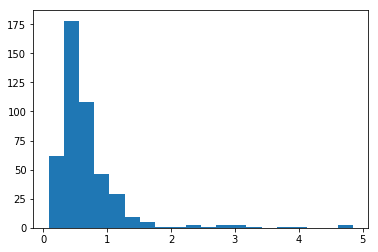

In [177]:
plt.hist(row_max, 20)

In [ ]:
# example

In [165]:
ex1 = data_bias.iloc[:, 1]

In [166]:
ex2 = list(ex1)
ex2.index(max(ex2))

136

In [169]:
data_bias.iloc[136:137,:]

,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,...,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018
Date,,,,,,,,,,,,,,,,,,,,,
DWDP US Equity,1.019876,1.091006,1.177123,1.029888,1.071683,1.366084,1.479045,1.401406,1.573096,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0


In [133]:
from scipy.stats import norm

# dist
def dist(data):
    mean = np.mean(data)
    std = np.std(data)
    
    points = np.random.normal(mean, std)
    

In [151]:
ex1 = [e for e in data_bias.iloc[:,6] if e != -100]

C:\Users\jingxiang.ma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


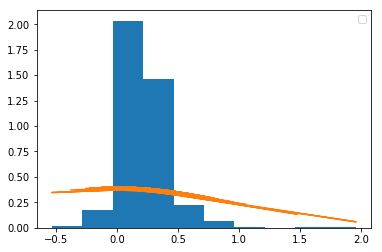

In [152]:
plt.hist(ex1, 10, normed = True)
plt.plot(ex1, norm.pdf(ex1))
plt.legend()

In [ ]:
# position of portfolio
def pos(data, nlong, nshort):
    nrow = len(data)
    ncol = len(data.columns)
    
    
    
    